**Project Title : ETL for <name of chosen dataset>**

In this project, you are required to perform a complete ETL for  any website that has customer's or user's feedback/reviews.

Details on the project are given below :

(1) EXTRACT : (10 pt)

a. Pick/choose your dataset - make sure it is legal to be scrape.  -1 points

b. scrape your data - identify your data attributes.  (at least 2 attribute per member) -   8 points

c. AT LEAST 100  or  more record of data are collected.  - 1 points



 (2) TRANSFORM: (10 pt)

a. Perform any necessary data processing - ( at least 4 types of data processing and one of the processing is on the review/feedback data). - 8 points
b. Perform at least 2 or more data visualisation ( e.g before and after data cleaning)  - 2 points



(3)LOAD: (2 pt)

 save your clean data into any type of file ( e.g .csv ) that can be read by pandas.

(4) REPORT (8 pt ):

Write your experience in ‘medium’ (medium.com) and put your shared/published (codes shared as github) in the medium as well. ( you will lose 4 point if report written not in medium.com)
SUBMIT your medium link to  ukmfolio and your cleaned .csv
only the appointed GROUP LEADER will submit the project.
WARNING: late submission will have 50%  point cut off and link unable to view will be given '0'.


References

[1]https://medium.com/@lzhou1110/how-to-embed-google-colaboratory-into-medium-in-3-steps-487b525b103c
[2] https://blog.medium.com/yes-we-get-the-gist-1c2a27cdfc22

Example of past year project report:
[1]https://medium.com/@ga04523/using-python-to-scrape-and-perform-etl-extraction-transformation-loading-on-a-website-7738729f8475
[2]https://medium.com/@ieraamiera/step-by-step-etl-process-e08a7dbd5749

# EXTRACT

The website we used for scrapping is CAKERUSH.
<br> The url is https://www.cakerush.my.
<br> However, to obtain more data on the product, we choose to use https://www.cakerush.my/collections/birthday-cake-delivery.

In [ ]:
!pip install BeautifulSoup4
!pip install requests
!pip install pandas

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

In [ ]:
url= 'https://www.cakerush.my/collections/birthday-cake-delivery'
response = requests.get(url)
data= response.text
soup = BeautifulSoup(data,'html.parser')

Our group project business's need is to determine the most popular and craved cakes on CAKERUSH. There are many attributes that can help us to achieve our business's need. We have scraped a few attributes from the website, which are **Product Name, Product Brand, Product Price, Average Ratings, Total Review, Availability For Next Day Delivery, Review, Number of 1 Star Ratings, Number of 2 Stars Ratings, Number of 3 Stars Ratings, Number of 4 Stars Ratings and Number of 5 Stars Ratings**.

Data Scraped:
1. Product Name
2. Product Brand
3. Product Price
4. Average Ratings
5. Total Review
6. Availability For Next Day Delivery
7. Review
8. Number of 1 Star Ratings
9. Number of 2 Stars Ratings
10. Number of 3 Stars Ratings
11. Number of 4 Stars Ratings
12. Number of 5 Stars Ratings.

In [ ]:
count = 1
namecount = 1
count2 = 1
limit = 200
base_url = 'https://www.cakerush.my'
url = 'https://www.cakerush.my/collections/birthday-cake-delivery'

# Create an empty list to store the scraped data
product_name = []
product_brand =[]
product_price = []
product_ratings = []
product_totalReview = []
product_nextDayDelivery = []
product_review = []
no_of_ratings1 = []
no_of_ratings2 = []
no_of_ratings3 = []
no_of_ratings4 = []
no_of_ratings5 = []
product_url = []

while count < limit:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    cake_divss = soup.find_all("div", {"class": "image__container"})
    for cake_div in cake_divss:
        sameDay = cake_div.find("span", {"class": "thumb-bottom-overlap-text"})

        if sameDay:
           sameDay = sameDay.text
        else:
           sameDay = 'N/A'

        product_nextDayDelivery.append(sameDay)

        count2 += 1
        if count2 > limit:
            break

    cakes_divss = soup.find_all("div", {"class": "product-details"})

    for cake_div in cakes_divss:
        name = cake_div.find("span", {"class": "title"}).text
        brand = cake_div.find("span", {"class": "brand"}).text
        price = cake_div.find("span", {"class": "money"}).text
        noOfReview = cake_div.find("span", {"class": "jdgm-prev-badge__text"}).text

        rating_div = cake_div.find("div",{"class":"jdgm-prev-badge"})
        rating = rating_div["data-average-rating"]

        product_name.append(name)
        product_brand.append(brand)
        product_price.append(price)
        product_totalReview.append(noOfReview)
        product_ratings.append(rating)

        namecount += 1
        if namecount > limit:
            break

    # Scraping logic for the current page
    cake_divs = soup.find_all("div", {"class": "product-wrap available"})
    for cake_div in cake_divs:
        link = cake_div.find("a").get('href')
        abs_url = base_url + link

        response1 = requests.get(abs_url)
        data1 = response1.text
        soup1 = BeautifulSoup(data1, 'html.parser')

        review = soup1.find('div', {'class': 'jdgm-rev-widg__reviews'}).text if soup1.find('div', {'class': 'jdgm-rev-widg__reviews'}) else 'N/A'
        product_review.append(review)

        # Find the outer div
        outer_div1 = soup1.find('div', {'data-rating': '5'})
        outer_div2 = soup1.find('div', {'data-rating': '4'})
        outer_div3 = soup1.find('div', {'data-rating': '3'})
        outer_div4 = soup1.find('div', {'data-rating': '2'})
        outer_div5 = soup1.find('div', {'data-rating': '1'})

        # Find the inner div within the outer div
        if outer_div1:
            inner_divs1 = outer_div1.find_all('div', class_='jdgm-histogram__frequency')
            for inner_div1 in inner_divs1:
                ratings1 = inner_div1.text

        else:
            ratings1 = 'null'

        if outer_div2:
            inner_divs2 = outer_div2.find_all('div', class_='jdgm-histogram__frequency')
            for inner_div2 in inner_divs2:
                ratings2 = inner_div2.text

        else:
            ratings2 = 'null'

        if outer_div3:
            inner_divs3 = outer_div3.find_all('div', class_='jdgm-histogram__frequency')
            for inner_div3 in inner_divs3:
                ratings3 = inner_div3.text

        else:
            ratings3 = 'null'

        if outer_div4:
            inner_divs4 = outer_div4.find_all('div', class_='jdgm-histogram__frequency')
            for inner_div4 in inner_divs4:
                ratings4 = inner_div4.text

        else:
            ratings4 = 'null'

        if outer_div5:
            inner_divs5 = outer_div5.find_all('div', class_='jdgm-histogram__frequency')
            for inner_div5 in inner_divs5:
                ratings5 = inner_div5.text

        else:
            ratings5 = 'null'

        # Append data to the lists

        product_url.append(abs_url)
        no_of_ratings1.append(ratings1)
        no_of_ratings2.append(ratings2)
        no_of_ratings3.append(ratings3)
        no_of_ratings4.append(ratings4)
        no_of_ratings5.append(ratings5)

        count = count + 1

        if count > limit:
            break

        # Check for the presence of the "Load More" button
        load_more_button = soup.find("a", {"class": "load-more__btn"})

        if load_more_button:
            # Extract the next page URL from the "Load More" button's href attribute
            next_page_url = base_url + load_more_button['href']
            url = next_page_url
        else:
            break


In [ ]:
df = pd.DataFrame({
    'Product Name': product_name,
    'Product URL': product_url,
    'Product Brand': product_brand,
    'Product Price': product_price,
    'Product Ratings': product_ratings,
    'Availability of Next Day Delivery': product_nextDayDelivery,
    'Product No of Reviews': product_totalReview,
    'Number of 5 Stars Ratings': no_of_ratings1,
    'Number of 4 Stars Ratings': no_of_ratings2,
    'Number of 3 Stars Ratings': no_of_ratings3,
    'Number of 2 Stars Ratings': no_of_ratings4,
    'Number of 1 Star Ratings': no_of_ratings5,
    'Review': product_review,
})

In [ ]:
df

,Product Name,Product URL,Product Brand,Product Price,Product Ratings,Availability of Next Day Delivery,Product No of Reviews,Number of 5 Stars Ratings,Number of 4 Stars Ratings,Number of 3 Stars Ratings,Number of 2 Stars Ratings,Number of 1 Star Ratings,Review
0,Cake Explosion Gift Box,https://www.cakerush.my/products/cake-explosio...,CakeRush,RM129.00,4.17,KLANG VALLEY ONLY,102 reviews,(65),(11),(12),(6),(8),S Siti Nice surprise Nice ...
1,I Love U 4Ever Cake,https://www.cakerush.my/products/i-love-u-4eve...,KOBO Bakery,RM97.90,4.68,Next Day Delivery,412 reviews,(309),(84),(13),(1),(5),N Nor m. This is my 8 purchased ...
2,Romantic Cake,https://www.cakerush.my/products/romantic-cake...,KOBO Bakery,RM59.90,4.53,Next Day Delivery,75 reviews,(57),(10),(2),(3),(3),A Anonymous Birthday Thanks allot...
3,Fruit Strudels Set,https://www.cakerush.my/products/fruit-strudel...,Icon Brewings,RM98.00,4.35,Next Day Delivery,34 reviews,(24),(6),(0),(0),(4),J JCLeong Delivery status I did n...
4,Mango Rose Cake,https://www.cakerush.my/products/mango-rose-ca...,KOBO Bakery,RM94.90,4.77,Next Day Delivery,190 reviews,(149),(40),(0),(0),(1),N Norazlina R. Cake was late del...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Cheesy Breezy Mooncake Set,https://www.cakerush.my/products/cheesy-breezy...,In the Clouds,RM79.90,0.00,N/A,No reviews,(0),(0),(0),(0),(0),
196,Fruit Jelly Mooncake Set,https://www.cakerush.my/products/fruit-jelly-m...,In the Clouds,RM139.90,0.00,N/A,No reviews,(0),(0),(0),(0),(0),
197,Lemon Poppy Birthday Cake,https://www.cakerush.my/products/happy-birthda...,Oven & Chalice,RM99.90,0.00,N/A,No reviews,(0),(0),(0),(0),(0),
198,Mini Mousse Balloons Cake,https://www.cakerush.my/products/mini-balloon-...,Oven & Chalice,RM109.90,0.00,N/A,No reviews,(0),(0),(0),(0),(0),


In [ ]:
df.to_csv("dfDataRaw.csv")

# TRANSFORM

Upon inspecting the data extracted, there are some data that need to be cleaned to improve its quality. A new DataFrame df_clean is created to perform data processing.

In [ ]:
df_clean = df.copy()
df_clean

,Product Name,Product URL,Product Brand,Product Price,Product Ratings,Availability of Next Day Delivery,Product No of Reviews,Number of 5 Stars Ratings,Number of 4 Stars Ratings,Number of 3 Stars Ratings,Number of 2 Stars Ratings,Number of 1 Star Ratings,Review
0,Cake Explosion Gift Box,https://www.cakerush.my/products/cake-explosio...,CakeRush,RM129.00,4.17,KLANG VALLEY ONLY,102 reviews,(65),(11),(12),(6),(8),S Siti Nice surprise Nice ...
1,I Love U 4Ever Cake,https://www.cakerush.my/products/i-love-u-4eve...,KOBO Bakery,RM97.90,4.68,Next Day Delivery,412 reviews,(309),(84),(13),(1),(5),N Nor m. This is my 8 purchased ...
2,Romantic Cake,https://www.cakerush.my/products/romantic-cake...,KOBO Bakery,RM59.90,4.53,Next Day Delivery,75 reviews,(57),(10),(2),(3),(3),A Anonymous Birthday Thanks allot...
3,Fruit Strudels Set,https://www.cakerush.my/products/fruit-strudel...,Icon Brewings,RM98.00,4.35,Next Day Delivery,34 reviews,(24),(6),(0),(0),(4),J JCLeong Delivery status I did n...
4,Mango Rose Cake,https://www.cakerush.my/products/mango-rose-ca...,KOBO Bakery,RM94.90,4.77,Next Day Delivery,190 reviews,(149),(40),(0),(0),(1),N Norazlina R. Cake was late del...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Cheesy Breezy Mooncake Set,https://www.cakerush.my/products/cheesy-breezy...,In the Clouds,RM79.90,0.00,N/A,No reviews,(0),(0),(0),(0),(0),
196,Fruit Jelly Mooncake Set,https://www.cakerush.my/products/fruit-jelly-m...,In the Clouds,RM139.90,0.00,N/A,No reviews,(0),(0),(0),(0),(0),
197,Lemon Poppy Birthday Cake,https://www.cakerush.my/products/happy-birthda...,Oven & Chalice,RM99.90,0.00,N/A,No reviews,(0),(0),(0),(0),(0),
198,Mini Mousse Balloons Cake,https://www.cakerush.my/products/mini-balloon-...,Oven & Chalice,RM109.90,0.00,N/A,No reviews,(0),(0),(0),(0),(0),


**Product No of Reviews**

Rows of data that have no reviews are undesirable and removed. The data in column 'Product No of Reviews' are checked. The rows with missing value ' No reviews' are removed. Empty spaces in the front are also removed. Lastly, the data will have the words "reviews" and "review" removed, and datatype set to integer.

In [ ]:
df_clean['Product No of Reviews'].unique()

array([' 102 reviews', ' 412 reviews', ' 75 reviews', ' 34 reviews',
       ' 190 reviews', ' 117 reviews', ' 197 reviews', ' 107 reviews',
       ' 139 reviews', ' 134 reviews', ' 140 reviews', ' 54 reviews',
       ' 69 reviews', ' 110 reviews', ' 23 reviews', ' 41 reviews',
       ' 21 reviews', ' 12 reviews', ' 56 reviews', ' 84 reviews',
       ' 76 reviews', ' 9 reviews', ' 14 reviews', ' 33 reviews',
       ' 29 reviews', ' 8 reviews', ' 19 reviews', ' 47 reviews',
       ' 176 reviews', ' 7 reviews', ' 10 reviews', ' 63 reviews',
       ' 1 review', ' 11 reviews', ' No reviews', ' 25 reviews',
       ' 20 reviews', ' 46 reviews', ' 67 reviews', ' 154 reviews',
       ' 78 reviews', ' 39 reviews', ' 3 reviews', ' 4 reviews',
       ' 36 reviews', ' 27 reviews', ' 2 reviews', ' 31 reviews',
       ' 50 reviews', ' 6 reviews', ' 5 reviews', ' 16 reviews',
       ' 40 reviews', ' 17 reviews', ' 26 reviews', ' 49 reviews',
       ' 114 reviews', ' 18 reviews', ' 15 reviews', ' 38 re

In [ ]:
df_clean.replace(' No reviews', np.nan, inplace = True)
df_clean.dropna(inplace = True)
df_clean

,Product Name,Product URL,Product Brand,Product Price,Product Ratings,Availability of Next Day Delivery,Product No of Reviews,Number of 5 Stars Ratings,Number of 4 Stars Ratings,Number of 3 Stars Ratings,Number of 2 Stars Ratings,Number of 1 Star Ratings,Review
0,Cake Explosion Gift Box,https://www.cakerush.my/products/cake-explosio...,CakeRush,RM129.00,4.17,KLANG VALLEY ONLY,102 reviews,(65),(11),(12),(6),(8),S Siti Nice surprise Nice ...
1,I Love U 4Ever Cake,https://www.cakerush.my/products/i-love-u-4eve...,KOBO Bakery,RM97.90,4.68,Next Day Delivery,412 reviews,(309),(84),(13),(1),(5),N Nor m. This is my 8 purchased ...
2,Romantic Cake,https://www.cakerush.my/products/romantic-cake...,KOBO Bakery,RM59.90,4.53,Next Day Delivery,75 reviews,(57),(10),(2),(3),(3),A Anonymous Birthday Thanks allot...
3,Fruit Strudels Set,https://www.cakerush.my/products/fruit-strudel...,Icon Brewings,RM98.00,4.35,Next Day Delivery,34 reviews,(24),(6),(0),(0),(4),J JCLeong Delivery status I did n...
4,Mango Rose Cake,https://www.cakerush.my/products/mango-rose-ca...,KOBO Bakery,RM94.90,4.77,Next Day Delivery,190 reviews,(149),(40),(0),(0),(1),N Norazlina R. Cake was late del...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Premium Carrot Cake,https://www.cakerush.my/products/premium-carro...,Sweet Passion's Premium Cakes,RM92.90,4.33,N/A,69 reviews,(39),(20),(7),(0),(3),M MARIZ P. PACKING CAKE LOOKED NI...
173,Popcone Cake (Salted Caramel Chocolate),https://www.cakerush.my/products/popstar-cake-...,Ennoble,RM119.90,4.55,N/A,22 reviews,(13),(8),(1),(0),(0),K Kamal E. Good Fast reply from cu...
174,Rainbow Cake,https://www.cakerush.my/products/rainbow-cake-...,Junandus,RM102.90,4.79,Next Day Delivery,14 reviews,(11),(3),(0),(0),(0),D Dionique L. delivered on time th...
175,Salted Caramel Chocolate Cake,https://www.cakerush.my/products/salted-carame...,September Bakes,RM92.90,4.47,Next Day Delivery,47 reviews,(27),(15),(5),(0),(0),N Nadia T.M.P. It waa good. It can...


In [ ]:
df_clean['Product No of Reviews'] = df_clean['Product No of Reviews'].str.lstrip()
df_clean

,Product Name,Product URL,Product Brand,Product Price,Product Ratings,Availability of Next Day Delivery,Product No of Reviews,Number of 5 Stars Ratings,Number of 4 Stars Ratings,Number of 3 Stars Ratings,Number of 2 Stars Ratings,Number of 1 Star Ratings,Review
0,Cake Explosion Gift Box,https://www.cakerush.my/products/cake-explosio...,CakeRush,RM129.00,4.17,KLANG VALLEY ONLY,102 reviews,(65),(11),(12),(6),(8),S Siti Nice surprise Nice ...
1,I Love U 4Ever Cake,https://www.cakerush.my/products/i-love-u-4eve...,KOBO Bakery,RM97.90,4.68,Next Day Delivery,412 reviews,(309),(84),(13),(1),(5),N Nor m. This is my 8 purchased ...
2,Romantic Cake,https://www.cakerush.my/products/romantic-cake...,KOBO Bakery,RM59.90,4.53,Next Day Delivery,75 reviews,(57),(10),(2),(3),(3),A Anonymous Birthday Thanks allot...
3,Fruit Strudels Set,https://www.cakerush.my/products/fruit-strudel...,Icon Brewings,RM98.00,4.35,Next Day Delivery,34 reviews,(24),(6),(0),(0),(4),J JCLeong Delivery status I did n...
4,Mango Rose Cake,https://www.cakerush.my/products/mango-rose-ca...,KOBO Bakery,RM94.90,4.77,Next Day Delivery,190 reviews,(149),(40),(0),(0),(1),N Norazlina R. Cake was late del...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Premium Carrot Cake,https://www.cakerush.my/products/premium-carro...,Sweet Passion's Premium Cakes,RM92.90,4.33,N/A,69 reviews,(39),(20),(7),(0),(3),M MARIZ P. PACKING CAKE LOOKED NI...
173,Popcone Cake (Salted Caramel Chocolate),https://www.cakerush.my/products/popstar-cake-...,Ennoble,RM119.90,4.55,N/A,22 reviews,(13),(8),(1),(0),(0),K Kamal E. Good Fast reply from cu...
174,Rainbow Cake,https://www.cakerush.my/products/rainbow-cake-...,Junandus,RM102.90,4.79,Next Day Delivery,14 reviews,(11),(3),(0),(0),(0),D Dionique L. delivered on time th...
175,Salted Caramel Chocolate Cake,https://www.cakerush.my/products/salted-carame...,September Bakes,RM92.90,4.47,Next Day Delivery,47 reviews,(27),(15),(5),(0),(0),N Nadia T.M.P. It waa good. It can...


In [ ]:
df_clean['Product No of Reviews'] = df_clean['Product No of Reviews'].str.replace(' reviews', '')
df_clean['Product No of Reviews'] = df_clean['Product No of Reviews'].str.replace('review', '')
df_clean['Product No of Reviews'] = df_clean['Product No of Reviews'].astype("int")
df_clean['Product No of Reviews'].unique()

array([102, 412,  75,  34, 190, 117, 197, 107, 139, 134, 140,  54,  69,
       110,  23,  41,  21,  12,  56,  84,  76,   9,  14,  33,  29,   8,
        19,  47, 176,   7,  10,  63,   1,  11,  25,  20,  46,  67, 154,
        78,  39,   3,   4,  36,  27,   2,  31,  50,   6,   5,  16,  40,
        17,  26,  49, 114,  18,  15,  38,  22,  60])



**Availability of Next Day Delivery**

The column 'Availability of Next Day Delivery' is also checked for missing values.

To simplify the data in this column, 'Next Day Delivery' is changed to 'Yes', while 'KLANG VALLEY ONLY' and  'N/A' is changed to 'No'.

In [ ]:
df_clean['Availability of Next Day Delivery'].unique()

array(['KLANG VALLEY ONLY', 'Next Day Delivery', 'N/A'], dtype=object)

In [ ]:
df_clean.replace('KLANG VALLEY ONLY', 'No', inplace=True)
df_clean.replace('Next Day Delivery', 'Yes', inplace=True)
df_clean.replace('N/A', 'No', inplace = True)
df_clean

,Product Name,Product URL,Product Brand,Product Price,Product Ratings,Availability of Next Day Delivery,Product No of Reviews,Number of 5 Stars Ratings,Number of 4 Stars Ratings,Number of 3 Stars Ratings,Number of 2 Stars Ratings,Number of 1 Star Ratings,Review
0,Cake Explosion Gift Box,https://www.cakerush.my/products/cake-explosio...,CakeRush,RM129.00,4.17,No,102,(65),(11),(12),(6),(8),S Siti Nice surprise Nice ...
1,I Love U 4Ever Cake,https://www.cakerush.my/products/i-love-u-4eve...,KOBO Bakery,RM97.90,4.68,Yes,412,(309),(84),(13),(1),(5),N Nor m. This is my 8 purchased ...
2,Romantic Cake,https://www.cakerush.my/products/romantic-cake...,KOBO Bakery,RM59.90,4.53,Yes,75,(57),(10),(2),(3),(3),A Anonymous Birthday Thanks allot...
3,Fruit Strudels Set,https://www.cakerush.my/products/fruit-strudel...,Icon Brewings,RM98.00,4.35,Yes,34,(24),(6),(0),(0),(4),J JCLeong Delivery status I did n...
4,Mango Rose Cake,https://www.cakerush.my/products/mango-rose-ca...,KOBO Bakery,RM94.90,4.77,Yes,190,(149),(40),(0),(0),(1),N Norazlina R. Cake was late del...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Premium Carrot Cake,https://www.cakerush.my/products/premium-carro...,Sweet Passion's Premium Cakes,RM92.90,4.33,No,69,(39),(20),(7),(0),(3),M MARIZ P. PACKING CAKE LOOKED NI...
173,Popcone Cake (Salted Caramel Chocolate),https://www.cakerush.my/products/popstar-cake-...,Ennoble,RM119.90,4.55,No,22,(13),(8),(1),(0),(0),K Kamal E. Good Fast reply from cu...
174,Rainbow Cake,https://www.cakerush.my/products/rainbow-cake-...,Junandus,RM102.90,4.79,Yes,14,(11),(3),(0),(0),(0),D Dionique L. delivered on time th...
175,Salted Caramel Chocolate Cake,https://www.cakerush.my/products/salted-carame...,September Bakes,RM92.90,4.47,Yes,47,(27),(15),(5),(0),(0),N Nadia T.M.P. It waa good. It can...


**Number of Ratings**

The ratings have brackets that are unwanted and were removed.

In [ ]:
df_clean = df_clean.apply(lambda x: x.astype(str).str.replace(r'\(|\)', ''))
df_clean

<ipython-input-25-282104d69d1c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean = df_clean.apply(lambda x: x.astype(str).str.replace(r'\(|\)', ''))


,Product Name,Product URL,Product Brand,Product Price,Product Ratings,Availability of Next Day Delivery,Product No of Reviews,Number of 5 Stars Ratings,Number of 4 Stars Ratings,Number of 3 Stars Ratings,Number of 2 Stars Ratings,Number of 1 Star Ratings,Review
0,Cake Explosion Gift Box,https://www.cakerush.my/products/cake-explosio...,CakeRush,RM129.00,4.17,No,102,65,11,12,6,8,S Siti Nice surprise Nice ...
1,I Love U 4Ever Cake,https://www.cakerush.my/products/i-love-u-4eve...,KOBO Bakery,RM97.90,4.68,Yes,412,309,84,13,1,5,N Nor m. This is my 8 purchased ...
2,Romantic Cake,https://www.cakerush.my/products/romantic-cake...,KOBO Bakery,RM59.90,4.53,Yes,75,57,10,2,3,3,A Anonymous Birthday Thanks allot...
3,Fruit Strudels Set,https://www.cakerush.my/products/fruit-strudel...,Icon Brewings,RM98.00,4.35,Yes,34,24,6,0,0,4,J JCLeong Delivery status I did n...
4,Mango Rose Cake,https://www.cakerush.my/products/mango-rose-ca...,KOBO Bakery,RM94.90,4.77,Yes,190,149,40,0,0,1,N Norazlina R. Cake was late del...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Premium Carrot Cake,https://www.cakerush.my/products/premium-carro...,Sweet Passion's Premium Cakes,RM92.90,4.33,No,69,39,20,7,0,3,M MARIZ P. PACKING CAKE LOOKED NI...
173,Popcone Cake Salted Caramel Chocolate,https://www.cakerush.my/products/popstar-cake-...,Ennoble,RM119.90,4.55,No,22,13,8,1,0,0,K Kamal E. Good Fast reply from cu...
174,Rainbow Cake,https://www.cakerush.my/products/rainbow-cake-...,Junandus,RM102.90,4.79,Yes,14,11,3,0,0,0,D Dionique L. delivered on time th...
175,Salted Caramel Chocolate Cake,https://www.cakerush.my/products/salted-carame...,September Bakes,RM92.90,4.47,Yes,47,27,15,5,0,0,N Nadia T.M.P. It waa good. It can...


Here, we need to change the data type of number of ratings for 1 Star, number of ratings for 2 Stars, number of ratings for 3 Stars, number of ratings for 4 Stars and number of ratings for 5 Stars to integer so that the data can be manipulated easily.

In [ ]:
df_clean[['Number of 5 Stars Ratings', 'Number of 4 Stars Ratings', 'Number of 3 Stars Ratings', 'Number of 2 Stars Ratings', 'Number of 1 Star Ratings']]= df_clean[['Number of 5 Stars Ratings', 'Number of 4 Stars Ratings', 'Number of 3 Stars Ratings', 'Number of 2 Stars Ratings', 'Number of 1 Star Ratings']].astype(int)

df_clean

,Product Name,Product URL,Product Brand,Product Price,Product Ratings,Availability of Next Day Delivery,Product No of Reviews,Number of 5 Stars Ratings,Number of 4 Stars Ratings,Number of 3 Stars Ratings,Number of 2 Stars Ratings,Number of 1 Star Ratings,Review
0,Cake Explosion Gift Box,https://www.cakerush.my/products/cake-explosio...,CakeRush,RM129.00,4.17,No,102,65,11,12,6,8,S Siti Nice surprise Nice ...
1,I Love U 4Ever Cake,https://www.cakerush.my/products/i-love-u-4eve...,KOBO Bakery,RM97.90,4.68,Yes,412,309,84,13,1,5,N Nor m. This is my 8 purchased ...
2,Romantic Cake,https://www.cakerush.my/products/romantic-cake...,KOBO Bakery,RM59.90,4.53,Yes,75,57,10,2,3,3,A Anonymous Birthday Thanks allot...
3,Fruit Strudels Set,https://www.cakerush.my/products/fruit-strudel...,Icon Brewings,RM98.00,4.35,Yes,34,24,6,0,0,4,J JCLeong Delivery status I did n...
4,Mango Rose Cake,https://www.cakerush.my/products/mango-rose-ca...,KOBO Bakery,RM94.90,4.77,Yes,190,149,40,0,0,1,N Norazlina R. Cake was late del...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Premium Carrot Cake,https://www.cakerush.my/products/premium-carro...,Sweet Passion's Premium Cakes,RM92.90,4.33,No,69,39,20,7,0,3,M MARIZ P. PACKING CAKE LOOKED NI...
173,Popcone Cake Salted Caramel Chocolate,https://www.cakerush.my/products/popstar-cake-...,Ennoble,RM119.90,4.55,No,22,13,8,1,0,0,K Kamal E. Good Fast reply from cu...
174,Rainbow Cake,https://www.cakerush.my/products/rainbow-cake-...,Junandus,RM102.90,4.79,Yes,14,11,3,0,0,0,D Dionique L. delivered on time th...
175,Salted Caramel Chocolate Cake,https://www.cakerush.my/products/salted-carame...,September Bakes,RM92.90,4.47,Yes,47,27,15,5,0,0,N Nadia T.M.P. It waa good. It can...


Now, we have the scraped data of number of ratings for 1 Star, 2 Stars, 3 Stars, 4 Stars and 5 Stars. We can further transform these data into 2 categories, which are number of good ratings (4 Stars and above) and number of bad ratings (3 Stars and below).

In [ ]:
#Number of Good Ratings
df_clean['Number of Good Ratings'] = df_clean[['Number of 4 Stars Ratings', 'Number of 5 Stars Ratings']].sum(axis=1)

#Number of Bad Ratings
df_clean['Number of Bad Ratings'] = df_clean[['Number of 1 Star Ratings', 'Number of 2 Stars Ratings', 'Number of 3 Stars Ratings']].sum(axis=1)

# Drop the original columns
df_clean = df_clean.drop(['Number of 4 Stars Ratings', 'Number of 5 Stars Ratings', 'Number of 1 Star Ratings', 'Number of 2 Stars Ratings', 'Number of 3 Stars Ratings'], axis=1)

df_clean

,Product Name,Product URL,Product Brand,Product Price,Product Ratings,Availability of Next Day Delivery,Product No of Reviews,Review,Number of Good Ratings,Number of Bad Ratings
0,Cake Explosion Gift Box,https://www.cakerush.my/products/cake-explosio...,CakeRush,RM129.00,4.17,No,102,S Siti Nice surprise Nice ...,76,26
1,I Love U 4Ever Cake,https://www.cakerush.my/products/i-love-u-4eve...,KOBO Bakery,RM97.90,4.68,Yes,412,N Nor m. This is my 8 purchased ...,393,19
2,Romantic Cake,https://www.cakerush.my/products/romantic-cake...,KOBO Bakery,RM59.90,4.53,Yes,75,A Anonymous Birthday Thanks allot...,67,8
3,Fruit Strudels Set,https://www.cakerush.my/products/fruit-strudel...,Icon Brewings,RM98.00,4.35,Yes,34,J JCLeong Delivery status I did n...,30,4
4,Mango Rose Cake,https://www.cakerush.my/products/mango-rose-ca...,KOBO Bakery,RM94.90,4.77,Yes,190,N Norazlina R. Cake was late del...,189,1
...,...,...,...,...,...,...,...,...,...,...
172,Premium Carrot Cake,https://www.cakerush.my/products/premium-carro...,Sweet Passion's Premium Cakes,RM92.90,4.33,No,69,M MARIZ P. PACKING CAKE LOOKED NI...,59,10
173,Popcone Cake Salted Caramel Chocolate,https://www.cakerush.my/products/popstar-cake-...,Ennoble,RM119.90,4.55,No,22,K Kamal E. Good Fast reply from cu...,21,1
174,Rainbow Cake,https://www.cakerush.my/products/rainbow-cake-...,Junandus,RM102.90,4.79,Yes,14,D Dionique L. delivered on time th...,14,0
175,Salted Caramel Chocolate Cake,https://www.cakerush.my/products/salted-carame...,September Bakes,RM92.90,4.47,Yes,47,N Nadia T.M.P. It waa good. It can...,42,5


Until here, the data is fully cleaned and can be used for data visualisation using graph.
<br><br>Two more columns are added for a better understanding about the data. The columns contain Normalized Good Ratings and Normalized Bad Ratings. The purpose of applying MinMax scaling is to bring all values within a specific range, which is between 0 to 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

# Fit and transform the 'Number of Good Ratings' and 'Number of Bad Ratings' using MinMaxScaler
df_clean['Normalized Good Ratings'] = min_max_scaler.fit_transform(df_clean[['Number of Good Ratings']])
df_clean['Normalized Bad Ratings'] = min_max_scaler.fit_transform(df_clean[['Number of Bad Ratings']])

df_clean

,Product Name,Product URL,Product Brand,Product Price,Product Ratings,Availability of Next Day Delivery,Product No of Reviews,Review,Number of Good Ratings,Number of Bad Ratings,Normalized Good Ratings,Normalized Bad Ratings
0,Cake Explosion Gift Box,https://www.cakerush.my/products/cake-explosio...,CakeRush,RM129.00,4.17,No,102,S Siti Nice surprise Nice ...,76,26,0.191327,1.000000
1,I Love U 4Ever Cake,https://www.cakerush.my/products/i-love-u-4eve...,KOBO Bakery,RM97.90,4.68,Yes,412,N Nor m. This is my 8 purchased ...,393,19,1.000000,0.730769
2,Romantic Cake,https://www.cakerush.my/products/romantic-cake...,KOBO Bakery,RM59.90,4.53,Yes,75,A Anonymous Birthday Thanks allot...,67,8,0.168367,0.307692
3,Fruit Strudels Set,https://www.cakerush.my/products/fruit-strudel...,Icon Brewings,RM98.00,4.35,Yes,34,J JCLeong Delivery status I did n...,30,4,0.073980,0.153846
4,Mango Rose Cake,https://www.cakerush.my/products/mango-rose-ca...,KOBO Bakery,RM94.90,4.77,Yes,190,N Norazlina R. Cake was late del...,189,1,0.479592,0.038462
...,...,...,...,...,...,...,...,...,...,...,...,...
172,Premium Carrot Cake,https://www.cakerush.my/products/premium-carro...,Sweet Passion's Premium Cakes,RM92.90,4.33,No,69,M MARIZ P. PACKING CAKE LOOKED NI...,59,10,0.147959,0.384615
173,Popcone Cake Salted Caramel Chocolate,https://www.cakerush.my/products/popstar-cake-...,Ennoble,RM119.90,4.55,No,22,K Kamal E. Good Fast reply from cu...,21,1,0.051020,0.038462
174,Rainbow Cake,https://www.cakerush.my/products/rainbow-cake-...,Junandus,RM102.90,4.79,Yes,14,D Dionique L. delivered on time th...,14,0,0.033163,0.000000
175,Salted Caramel Chocolate Cake,https://www.cakerush.my/products/salted-carame...,September Bakes,RM92.90,4.47,Yes,47,N Nadia T.M.P. It waa good. It can...,42,5,0.104592,0.192308


**Cleaning Review**

The scraped review is messy because multiple review scraped at the same time with the username and all mixed together. We will reformat the review by removing username, adding ',' at the end of each review, remove any extra spacing and redundant review.

In [ ]:
mixed_reviews = df_clean['Review'].unique()
pd.options.mode.copy_on_write = True

In [ ]:
formatted_reviews = []
count = 0
# Filter out only the content from the review
for review in mixed_reviews:
    matches = re.findall(r'\s+([A-Z])\s+(\w+)\s+(.+?)(?=\s+([A-Z]|[a-z])\s+|\s*$)', review)
    for match in matches:
        content = match[2]
        formatted_reviews.append(f"{content} ")
# Remove extra spacing and inconsistent word
    reviews_array_no_extra_words = [re.sub(r'(\s+|\b)(([A-Z]|[a-z])\.\s+)', '', review) for review in formatted_reviews]
# Remove redundant review
    noRedundant_array = []
    for element in reviews_array_no_extra_words:
      if element not in noRedundant_array:
        noRedundant_array.append(element)

    df_clean['Review'][count] = "".join(noRedundant_array)
    count +=1
    formatted_reviews=[]

df_clean = df_clean.reset_index(drop=True)
df_clean

,Product Name,Product URL,Product Brand,Product Price,Product Ratings,Availability of Next Day Delivery,Product No of Reviews,Review,Number of Good Ratings,Number of Bad Ratings,Normalized Good Ratings,Normalized Bad Ratings
0,Cake Explosion Gift Box,https://www.cakerush.my/products/cake-explosio...,CakeRush,RM129.00,4.17,No,102,Nice surprise Nice Surprise box The cake also ...,76,26,0.191327,1.000000
1,I Love U 4Ever Cake,https://www.cakerush.my/products/i-love-u-4eve...,KOBO Bakery,RM97.90,4.68,Yes,412,This is my 8 purchased Beautiful cake. This ca...,393,19,1.000000,0.730769
2,Romantic Cake,https://www.cakerush.my/products/romantic-cake...,KOBO Bakery,RM59.90,4.53,Yes,75,Birthday Thanks allot outstanding service... f...,67,8,0.168367,0.307692
3,Fruit Strudels Set,https://www.cakerush.my/products/fruit-strudel...,Icon Brewings,RM98.00,4.35,Yes,34,Delivery status not received any status of say...,30,4,0.073980,0.153846
4,Mango Rose Cake,https://www.cakerush.my/products/mango-rose-ca...,KOBO Bakery,RM94.90,4.77,Yes,190,"Cake was late delivered, not as per delivery t...",189,1,0.479592,0.038462
...,...,...,...,...,...,...,...,...,...,...,...,...
133,Premium Carrot Cake,https://www.cakerush.my/products/premium-carro...,Sweet Passion's Premium Cakes,RM92.90,4.33,No,69,PACKING CAKE LOOKED NICE HOWEVER THE PACKING N...,59,10,0.147959,0.384615
134,Popcone Cake Salted Caramel Chocolate,https://www.cakerush.my/products/popstar-cake-...,Ennoble,RM119.90,4.55,No,22,Good Fast reply from customer service when to ...,21,1,0.051020,0.038462
135,Rainbow Cake,https://www.cakerush.my/products/rainbow-cake-...,Junandus,RM102.90,4.79,Yes,14,delivered on time the cake taste just perfect ...,14,0,0.033163,0.000000
136,Salted Caramel Chocolate Cake,https://www.cakerush.my/products/salted-carame...,September Bakes,RM92.90,4.47,Yes,47,T.M.It waa good. It can deliver cake fasf. Did...,42,5,0.104592,0.192308


In [ ]:
df_clean.to_csv("dfDataClean.csv")

# VISUALISATION

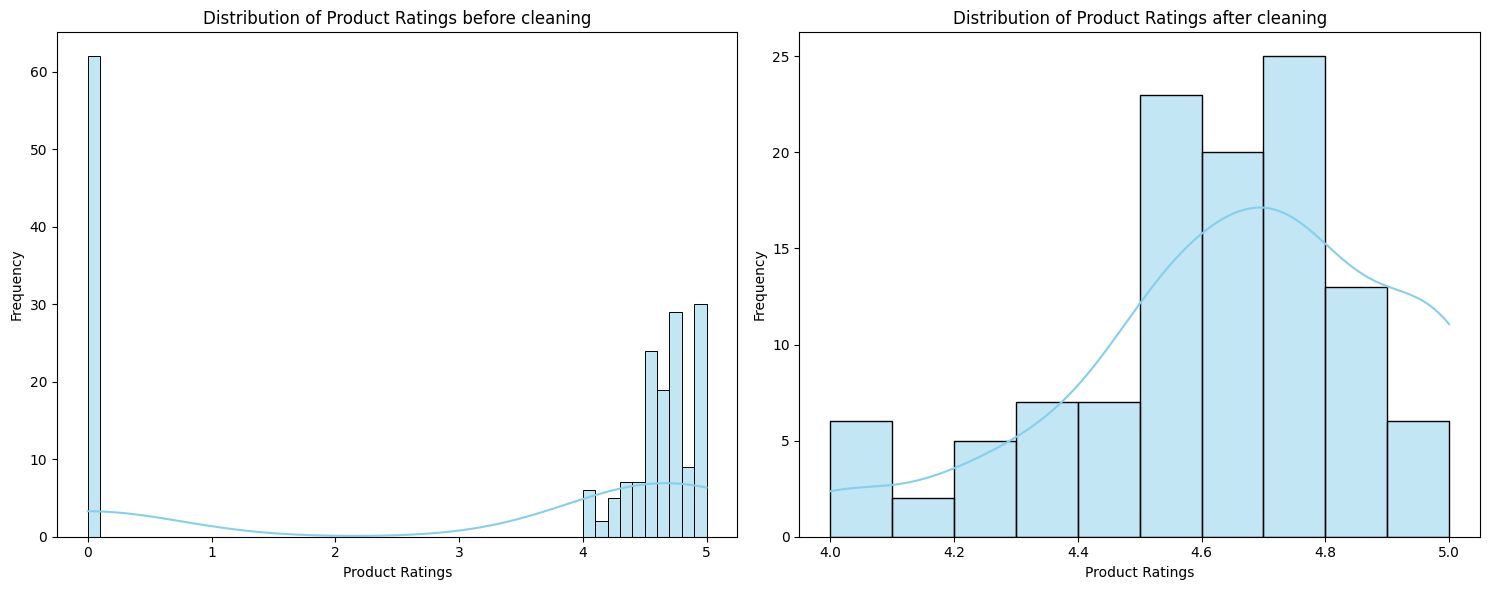

In [ ]:
import numpy as np

bins_before_clean = np.arange(df['Product Ratings'].min(), df['Product Ratings'].max() + 0.1, 0.1)
bins_after_clean = np.arange(df_clean['Product Ratings'].min(), df_clean['Product Ratings'].max() + 0.1, 0.1)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Before cleaning graph
sns.histplot(df['Product Ratings'].dropna(), bins=bins_before_clean, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Product Ratings')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Product Ratings before cleaning')

# After cleaning graph
sns.histplot(df_clean['Product Ratings'].dropna(), bins=bins_after_clean, kde=True, color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_xlabel('Product Ratings')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Product Ratings after cleaning')

plt.tight_layout()
plt.show()


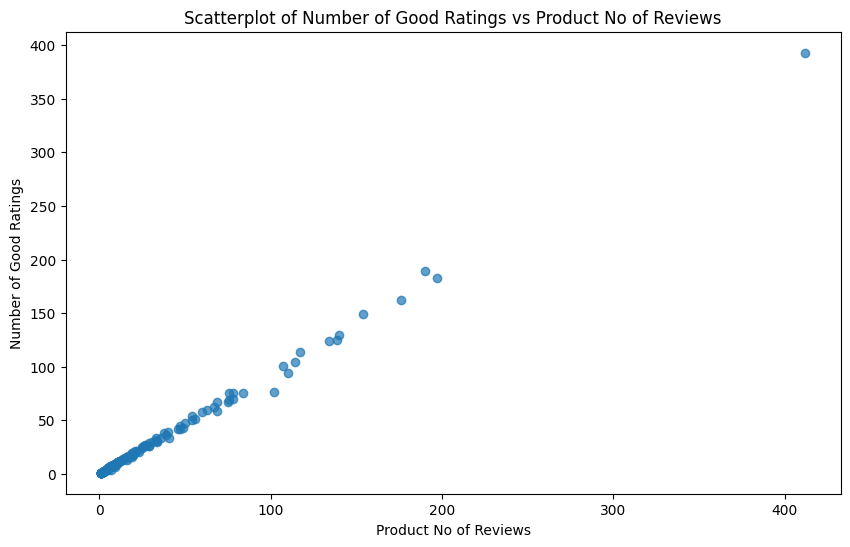

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    df_clean['Product No of Reviews'],
    df_clean['Number of Good Ratings'],
    alpha=0.7
)

plt.xlabel('Product No of Reviews')
plt.ylabel('Number of Good Ratings')
plt.title('Scatterplot of Number of Good Ratings vs Product No of Reviews')

plt.show()


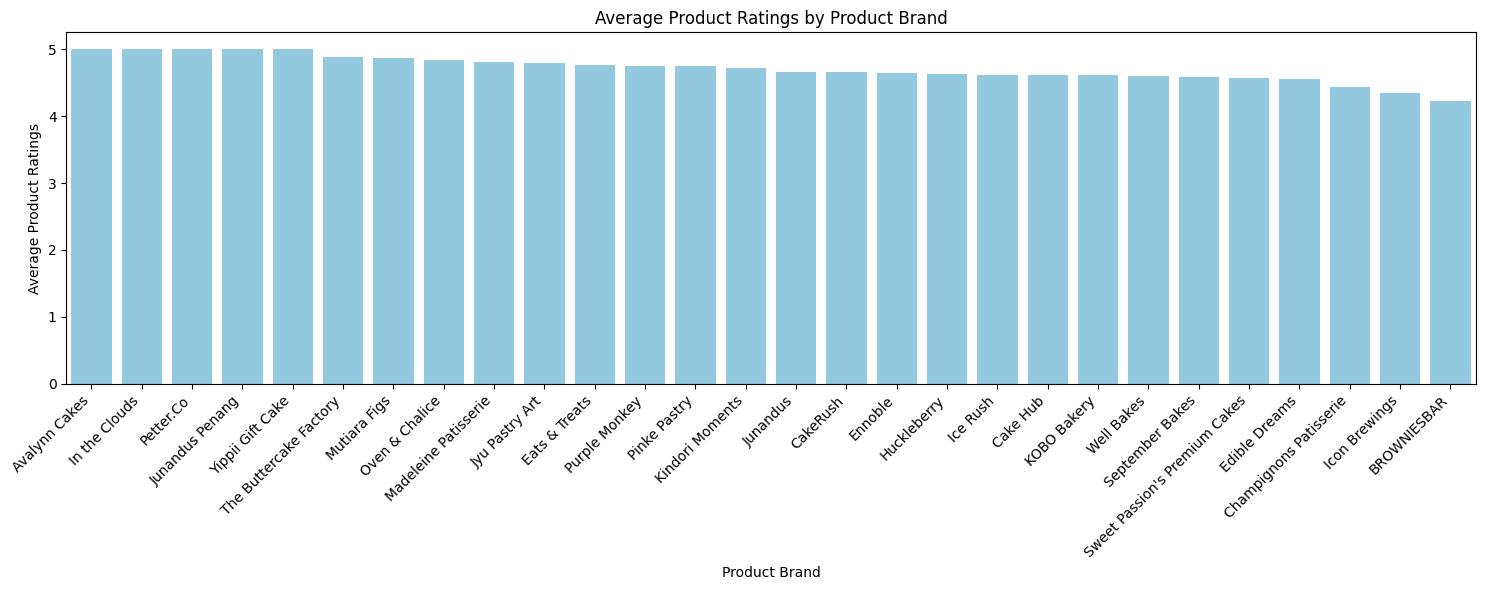

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Product Brand' and calculate the mean of 'Product Ratings'
brand_ratings_mean = df_clean.groupby('Product Brand')['Product Ratings'].mean().sort_values(ascending=False)

# Plot a bar chart of average product ratings by brand
plt.figure(figsize=(15, 6))
sns.barplot(x=brand_ratings_mean.index, y=brand_ratings_mean.values, color='skyblue')
plt.xlabel('Product Brand')
plt.ylabel('Average Product Ratings')
plt.title('Average Product Ratings by Product Brand')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()
